# Comparison of sensitivity among datasets

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
#load dataset
seu.cap <- readRDS(file = '../../data/seurat_object/Set3/seu_HQC_subclusterd2_Set3_221228.obj')
seu.cap
seu.tryp <- readRDS(file = '../../data/seurat_object/Set2/seu_HQC_subclusterd2_Set2_230105.obj')
seu.tryp
seu.ht <- readRDS(file = '../../data/seurat_object/Set1/seu_HQC_subclusterd2_Set1_230105.obj')
seu.ht
seu.nk <- readRDS(file = '../../data/seurat_object/NK-data/seu_HQC_subclusterd2_NK_230105.obj')
seu.nk

An object of class Seurat 
28745 features across 6118 samples within 2 assays 
Active assay: SCT (11239 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, tsne, umap, reumap

An object of class Seurat 
28355 features across 4855 samples within 2 assays 
Active assay: SCT (10851 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, tsne, umap, reumap

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

An object of class Seurat 
24124 features across 1476 samples within 2 assays 
Active assay: SCT (10003 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, reumap

## Counting detected genes in each dataset

In [4]:
#Get count table in Set 3
count.table.set3 <- as.matrix(GetAssayData(seu.cap,assay = 'RNA', slot = 'counts'))
gene.names <- row.names(count.table.set3)
is.to.remove <- grepl(x = gene.names, pattern = 'GAL4')|grepl(x = gene.names, pattern = 'mCherry')
sum(is.to.remove)
count.table.set3 <- count.table.set3[!is.to.remove,]
head(count.table.set3)

[1] 2

,AAAGAACGTGTTCGTA,AACACACTCGTGGAAG,AACCTTTCACCCTCTA,AATGCCAAGTCAGGGT,ACACAGTAGAAGGATG,ACAGCCGGTTAGGCTT,ACATCCCGTTACTCAG,ACCAACACACGGTCTG,ACCACAAGTACCTGTA,ACGATGTCAACGGTAG,⋯,TTTCACATCGTTGCCT,TTTCACATCTGATGGT,TTTCAGTCATGACTAC,TTTCATGAGGTCGTGA,TTTCCTCAGACTGTTC,TTTCGATAGAAGCCAC,TTTCGATGTGAGTGAC,TTTCGATGTGCAATAA,TTTGGTTTCTGGCTGG,TTTGTTGTCCACCTCA
Myo81F,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR41571,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR12798,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
lncRNA:CR46123,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
lncRNA:CR46122,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR40182,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
#Num of genes with at least 1 UMI detected in at least 1 cell in Set 3
detected.genes.set3 <- row.names(count.table.set3)[apply((count.table.set3 > 0), 1, FUN = sum) > 0]
length(detected.genes.set3)

[1] 13335

In [6]:
#Num of genes with at least 1 UMI detected in at least 1 cell in Set 2
count.table.set2 <- as.matrix(GetAssayData(seu.tryp,assay = 'RNA', slot = 'counts'))
head(count.table.set2)
detected.genes.set2 <- row.names(count.table.set2)[apply((count.table.set2 > 0), 1, FUN = sum) > 0]
length(detected.genes.set2)

,AAACCCACAAGTGATA,AAACCCACACTTGGCG,AAACCCATCCGTGTCT,AAACGAAAGAATCGTA,AAACGAAAGACTTCCA,AAACGAATCAAGCCTA,AAACGCTCACAGTATC,AAACGCTGTCGAACGA,AAACGCTTCCGATAGT,AAACGCTTCTGTCGCT,⋯,TGATGGTGTACGACTT,TGCGATAGTCAGGTGA,TGTGAGTAGATTGGGC,TTAATCCAGCCTTCTC,TTACGTTAGCGCGTTC,TTCACGCAGCAGGCAT,TTCCACGAGGTCCGAA,TTGGATGCATTCTTCA,TTGTTTGGTTCCTAAG,TTTCCTCCACGGTAGA
Myo81F,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR41571,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR12798,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
lncRNA:CR46123,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
lncRNA:CR46122,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR40182,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 13214

In [15]:
#Num of genes with at least 1 UMI detected in at least 1 cell in Set 1
count.table.set1 <- as.matrix(GetAssayData(seu.ht,assay = 'RNA', slot = 'counts'))
head(count.table.set1)
gene.names <- row.names(count.table.set1)
is.to.remove <- grepl(x = gene.names, pattern = 'ERCC')
sum(is.to.remove)
count.table.set1 <- count.table.set1[!is.to.remove,]
detected.genes.set1 <- row.names(count.table.set1)[apply((count.table.set1 > 0), 1, FUN = sum) > 0]
length(detected.genes.set1)

,batch1_col1CATCTG,batch1_col1GACTCA,batch1_col1GCTGAT,batch1_col1GTCTAC,batch1_col1TAGTCG,batch1_col1TCTAGC,batch1_col1TGCATC,batch1_col2ACACTG,batch1_col2ATGACG,batch1_col2CGTCAT,⋯,batch4_col19CGTCAT,batch4_col19GCTGAT,batch4_col19GTCTAC,batch4_col20CACAGT,batch4_col20CATCTG,batch4_col20GAGCTA,batch4_col20GTGCAT,batch4_col20TACTGC,batch4_col20TCTCAG,batch4_col20TGCATC
Myo81F,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR41571,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR12798,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
lncRNA:CR46123,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
lncRNA:CR46122,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CR40182,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


[1] 92

[1] 14785

## Comparison

In [39]:
genes.set1.not.set2 <- setdiff(detected.genes.set1, detected.genes.set2)
length(genes.set1.not.set2)

[1] 2022

In [40]:
genes.set1.not.set3 <- setdiff(detected.genes.set1, detected.genes.set3)
length(genes.set1.not.set3)

[1] 1986

In [41]:
# Num of genes detected only in Set 1 not in Set 2 and Set 3
genes.set1.only <- intersect(genes.set1.not.set2,genes.set1.not.set3)
length(genes.set1.only)

[1] 1374

In [42]:
genes.set2.not.set1 <- setdiff(detected.genes.set2, detected.genes.set1)
length(genes.set2.not.set1)

[1] 451

In [43]:
avg.set1.not.set2 <- apply(count.table.set1[genes.set1.not.set2,],1,mean)
avg.set1.not.set2 <- log1p(avg.set1.not.set2)


genes.common.set1.set2 <- intersect(detected.genes.set2, detected.genes.set1)
avg.common <- apply(count.table.set1[genes.common.set1.set2,],1,mean)
avg.common <- log1p(avg.common)

Warning message:
“Ignoring unknown parameters: outer.colour”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] 0.5429181
[1] 0.001962709


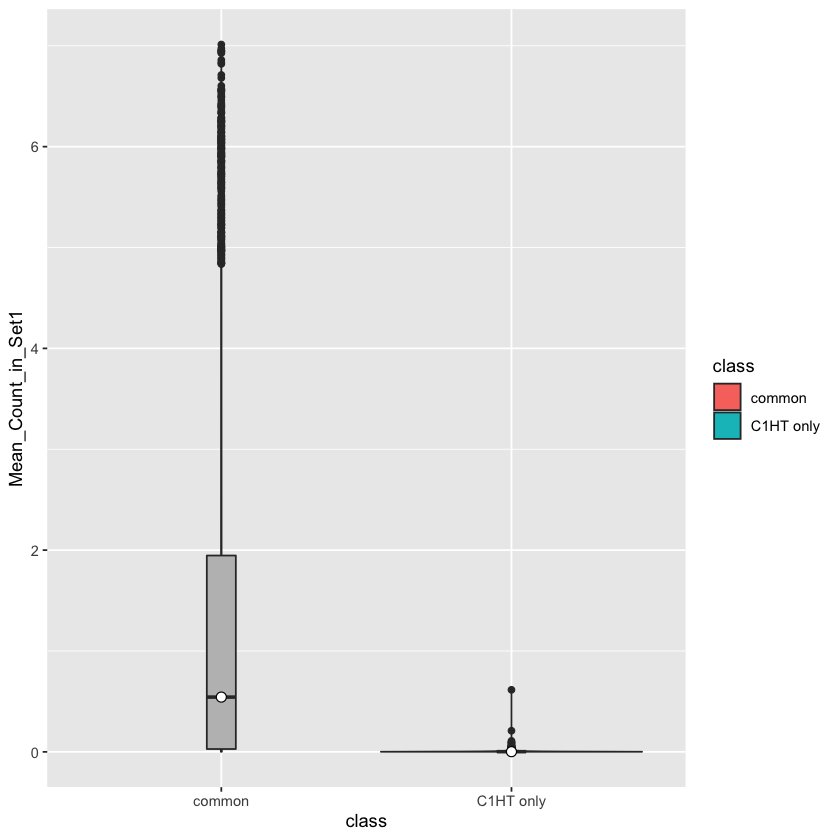

In [48]:
dat <- as.matrix(c(avg.common,avg.set1.not.set2))
df <- data.frame(dat)
df$class <- c(rep('common', length = length(avg.common)),
              rep('C1HT only', length = length(avg.set1.not.set2))
             )
colnames(df) <- c('Mean_Count_in_Set1', 'class')
df <- transform(df, class = factor(class, levels = c('common','C1HT only')))

df$gene_name <- c(genes.common.set1.set2, genes.set1.not.set2)

g <- ggplot(df, aes(x = class, y = Mean_Count_in_Set1, fill = class))
g <- g + geom_violin()
g <- g + geom_boxplot(width=.1,fill="gray",outer.colour=NA)
g <- g + stat_summary(fun.y=median,geom = "point", fill="white",shape=21,size=2.5)
plot(g)
print(median(df[df$class == 'common', 'Mean_Count_in_Set1']))
print(median(df[df$class == 'C1HT only', 'Mean_Count_in_Set1']))

In [58]:
prop.cell.set1.not.set2 <- apply((count.table.set1>0)[genes.set1.not.set2,],1,mean)
prop.cell.set1.not.set2 <- log10(prop.cell.set1.not.set2)

prop.cell.set2.not.set1 <- apply((count.table.set2>0)[genes.set2.not.set1,],1,mean)
prop.cell.set2.not.set1 <- log10(prop.cell.set2.not.set1)

genes.common.set1.set2 <- intersect(detected.genes.set2, detected.genes.set1)
prop.cell.common <- apply((count.table.set1>0)[genes.common.set1.set2,],1,mean)
prop.cell.common <- log10(prop.cell.common)

Warning message:
“Ignoring unknown parameters: outer.colour”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] -0.8063507
[1] -3.686189
[1] -2.706718


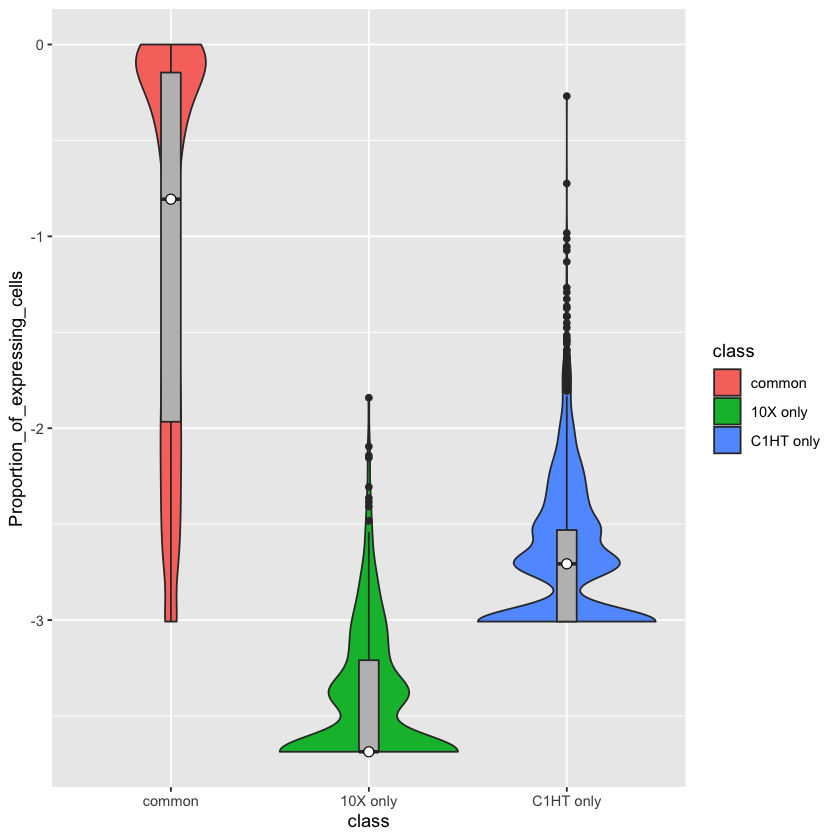

In [59]:
dat <- as.matrix(c(prop.cell.common,prop.cell.set2.not.set1,prop.cell.set1.not.set2))
df <- data.frame(dat)
df$class <- c(rep('common', length = length(prop.cell.common)),
              rep('10X only', length = length(prop.cell.set2.not.set1)),
              rep('C1HT only', length = length(prop.cell.set1.not.set2))
             )
colnames(df) <- c('Proportion_of_expressing_cells', 'class')
df <- transform(df, class = factor(class, levels = c('common','10X only','C1HT only')))

df$gene_name <- c(genes.common.set1.set2,genes.set2.not.set1, genes.set1.not.set2)

g <- ggplot(df, aes(x = class, y = Proportion_of_expressing_cells, fill = class))
g <- g + geom_violin()
g <- g + geom_boxplot(width=.1,fill="gray",outer.colour=NA)
g <- g + stat_summary(fun.y=median,geom = "point", fill="white",shape=21,size=2.5)
plot(g)
print(median(df[df$class == 'common', 'Proportion_of_expressing_cells']))
print(median(df[df$class == '10X only', 'Proportion_of_expressing_cells']))
print(median(df[df$class == 'C1HT only', 'Proportion_of_expressing_cells']))

In [64]:
prop.cell.set1.not.set2 <- apply((count.table.set1>0)[genes.set1.not.set2,],1,mean)
genes.set1.not.set2.1ptc <- genes.set1.not.set2[prop.cell.set1.not.set2 > 0.01]
genes.set1.not.set2.1ptc
length(genes.set1.not.set2.1ptc)

[1] "snRNA:U1:82Eb"        "snoRNA:Psi28S-3385a"  "lncRNA:TS20"         
  [4] "Ir84a"                "CR46300"              "CG5342"              
  [7] "Cyp313a2"             "Cyp313a3"             "Or88a"               
 [10] "CG3199"               "Dop1R1"               "Dscam3"              
 [13] "Indy-2-CG33934"       "Ir92a"                "e"                   
 [16] "CG10182"              "CG10183"              "snRNA:U1:95Cc"       
 [19] "CG31102"              "fid"                  "lncRNA:CR44319"      
 [22] "lncRNA:CR46061"       "snoRNA:Psi28S-3405a"  "snoRNA:Psi28S-3405b" 
 [25] "CG31371"              "PH4alphaSG1"          "lncRNA:CR46207"      
 [28] "snoRNA:Me28S-A2634c"  "snoRNA:Me28S-A2634b"  "CG32487"             
 [31] "snRNA:U5:63BC"        "lncRNA:CR45743"       "Mdr65"               
 [34] "GluRIA"               "CG32376"              "CG14837"             
 [37] "CG3222"               "lncRNA:CR46231"       "lncRNA:CR44557"      
 [40] "CG7804"               "Obp73a"               "CG6052"              
 [43] "Ir75b"                "CG13699"              "CG32204"             
 [46] "CG32214"              "CG7470"               "CR41501"             
 [49] "Tdc2"                 "CG43646"              "snoRNA:Psi28S-1936"  
 [52] "snoRNA:Me28S-A1322"   "snoRNA:Me28S-C3420b"  "snoRNA:Me28S-C3420a" 
 [55] "CG30048"              "lncRNA:CR44461"       "CG4744"              
 [58] "Adgf-E"               "jef"                  "CG43187"             
 [61] "CG10081"              "snoRNA:Psi28S-3316e"  "Grx1t"               
 [64] "CG3292"               "lncRNA:CR45327"       "lncRNA:CR42868"      
 [67] "CG30273-CG30269"      "CG13579"              "CG3588"              
 [70] "CG32793"              "CG42249"              "CG9164"              
 [73] "lncRNA:CR44754"       "snoRNA:Psi28S-1192c"  "CG15322"             
 [76] "RunxA"                "CG10918"              "5.8SrRNA-Psi:CR45854"
 [79] "5.8SrRNA-Psi:CR45857" "2SrRNA:CR45864"       "snoRNA:kis-a"        
 [82] "VGlut"                "CG15399"              "CG43798"             
 [85] "Acp26Aa"              "LUBEL"                "lncRNA:CR44148"      
 [88] "Apoltp"               "Cyp4e3"               "snoRNA:U14:30Ea"     
 [91] "snoRNA:SC35-b"        "asRNA:CR45683"        "CG42692"             
 [94] "CR45458"              "CG18480"              "CG12448"             
 [97] "CG43271"              "CG17571"              "snoRNA:Psi18S-525i"  
[100] "snoRNA:Psi18S-525j"   "lncRNA:CR44307"       "lncRNA:CR45334"      
[103] "CR41506"              "mt:tRNA:Tyr-GTA"      "mt:tRNA:Asn-GTT"     
[106] "mt:tRNA:Thr-TGT"

[1] 106

[1] 1

[1] 1.069366

[1] 6.272727

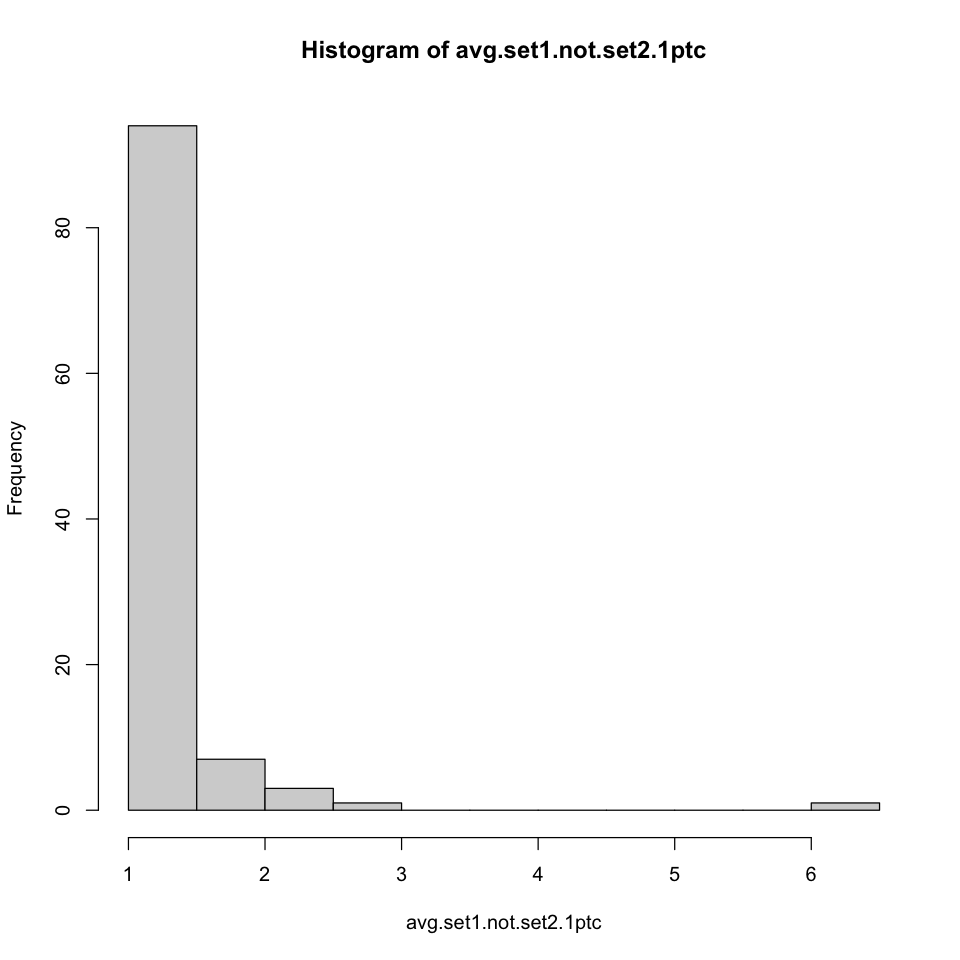

In [77]:
count.tmp <- count.table.set1[genes.set1.not.set2.1ptc,]
avg.set1.not.set2.1ptc <- apply(count.tmp,1,sum)/apply(count.tmp>0,1,sum)
# avg.set1.not.set2.1ptc <- log1p(avg.set1.not.set2.1ptc)
min(avg.set1.not.set2.1ptc)
median(avg.set1.not.set2.1ptc)
max(avg.set1.not.set2.1ptc)
options(repr.plot.width=8, repr.plot.height=8)
hist(avg.set1.not.set2.1ptc)

In [65]:
prop.cell.set2.not.set1 <- apply((count.table.set2>0)[genes.set2.not.set1,],1,mean)
genes.set2.not.set1.1ptc <- genes.set2.not.set1[prop.cell.set2.not.set1 > 0.01]
genes.set2.not.set1.1ptc
length(genes.set2.not.set1.1ptc)

[1] "lncRNA:CR44326"

[1] 1

In [67]:
prop.cell.set1.not.set2 <- apply((count.table.set1>0)[genes.set1.not.set2,],1,mean)
genes.set1.not.set2.10ptc <- genes.set1.not.set2[prop.cell.set1.not.set2 > 0.1]
genes.set1.not.set2.10ptc
length(genes.set1.not.set2.10ptc)
prop.cell.set1.not.set2[genes.set1.not.set2.10ptc]

[1] "lncRNA:CR44319" "CG32376"        "CG30048"

[1] 3

lncRNA:CR44319        CG32376        CG30048 
     0.1886051      0.5383104      0.1041257

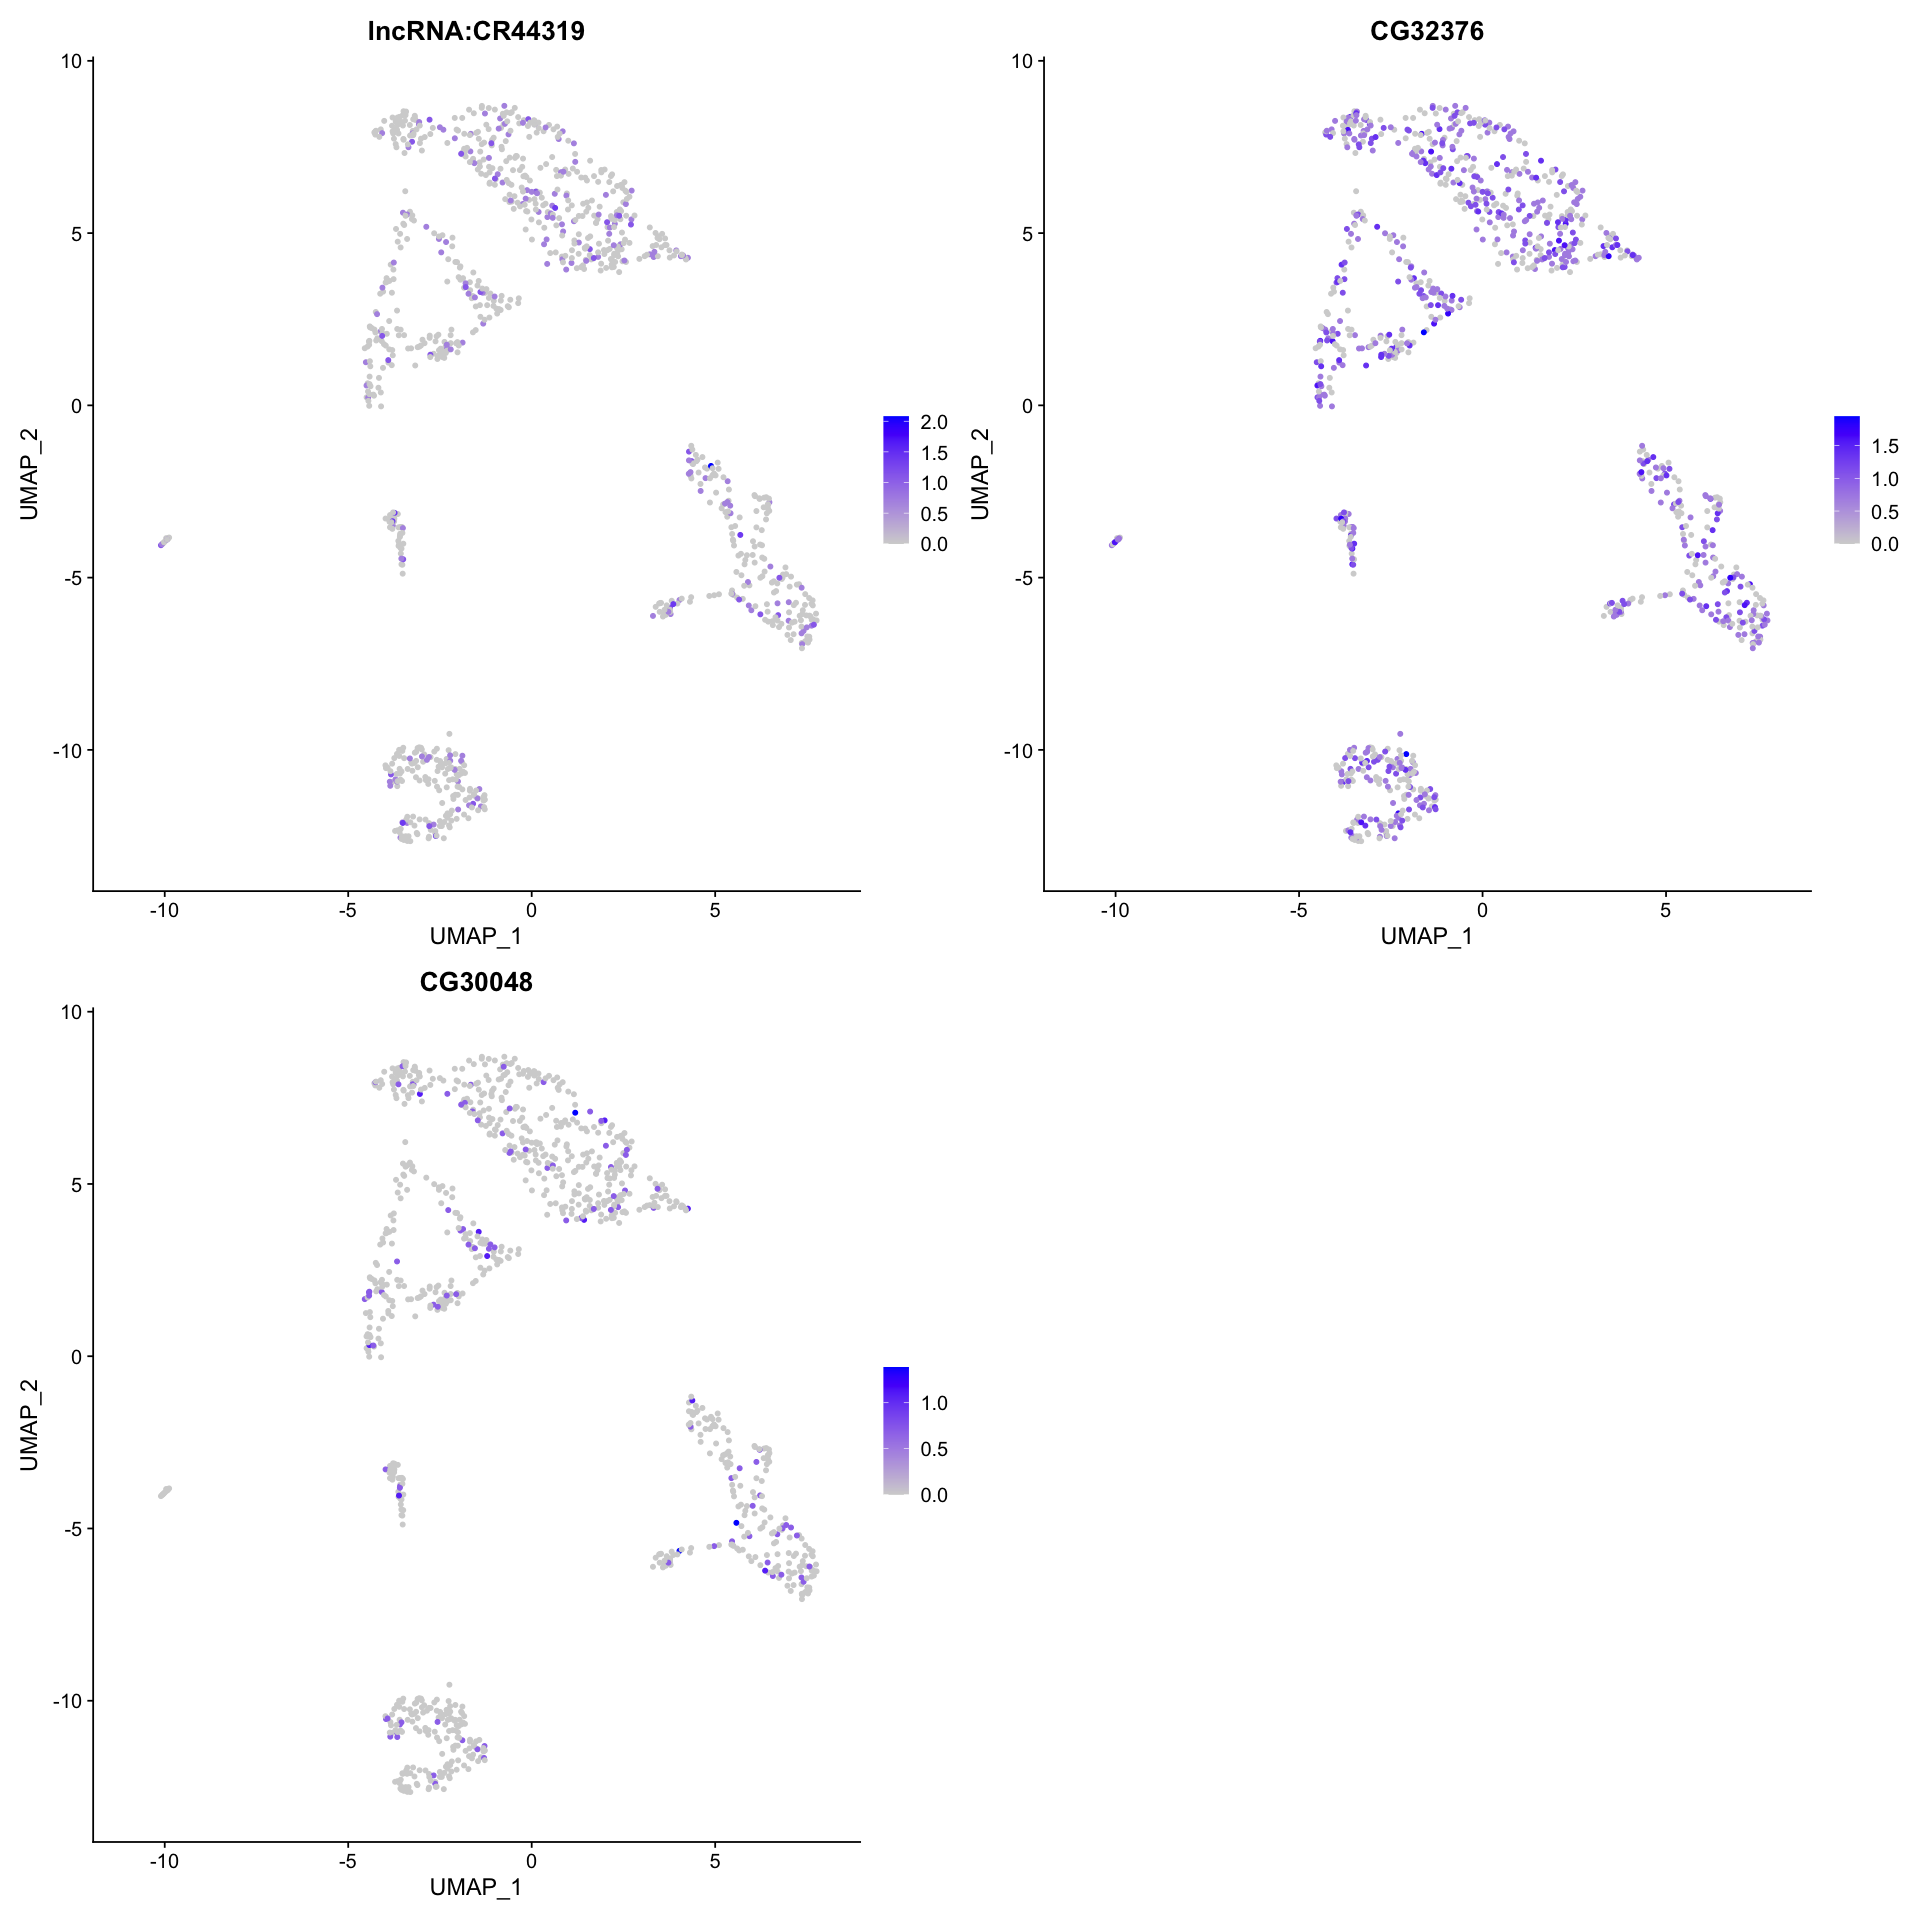

In [70]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ht,features = genes.set1.not.set2.10ptc)